In [26]:
# Passo 1

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

diab_df = pd.read_csv("dados.csv")

diab_df.head()

,nota_avaliacao,nota_ingles,nota_dinamica,nota_entrevista,monitoria,iniciacao_cientifica,vulnerabilidades_reportadas,Aprovado
0,10,9,8,9,0,1,1,1
1,9,7,8,10,0,0,1,1
2,9,10,7,7,1,1,0,1
3,8,8,10,10,0,1,1,1
4,8,9,8,8,0,1,0,1


In [27]:
#Passo 2

#split dataset in features and target variable 

diab_cols = [
    'nota_avaliacao',
    'nota_ingles', 
    'nota_dinamica', 
    'nota_entrevista',
    'monitoria',
    'iniciacao_cientifica',
    'vulnerabilidades_reportadas', 
    'Aprovado'
    ] 

X = diab_df[diab_cols]# Features 

y = diab_df.Aprovado # Target variable

In [28]:
#Passo 3
# Use a proporção de 0,25 para os dados de teste e de 0,75 para os dados de treinamento;
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, train_size=0.75)

In [29]:
# Passo 4

# instantiate the model 

logreg =  LogisticRegression(solver='liblinear') 



# fit the model with data 

logreg.fit(X_train,y_train) 



# predicting 

y_pred=logreg.predict(X_test) 

y_pred 

array([1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [30]:
# Passo 5

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

cnf_matrix 

array([[3, 1],
       [0, 4]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

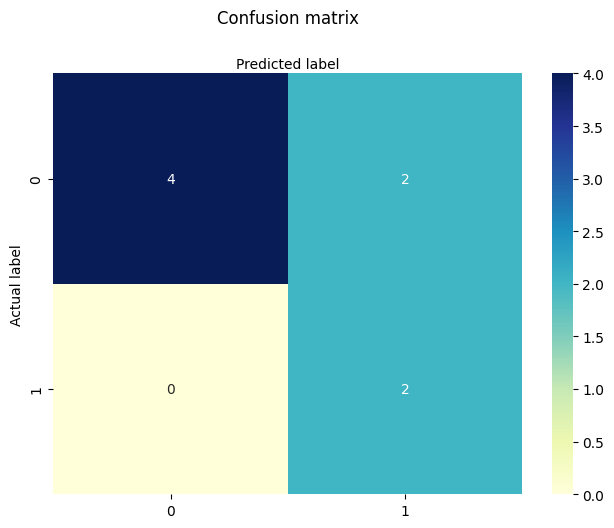

In [23]:
# Passo 6
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [ ]:
# Passo 7
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 